In [31]:
import numpy as np
import  matplotlib.pyplot as plt

In [15]:
A = np.array([[15,244,341],
             [212,323,44],
             [34,412,125],
             [13, 123, 344]])

In [21]:
A @ A.T

array([[176042,  96996, 143663, 147511],
       [ 96996, 151209, 145784,  57621],
       [143663, 145784, 186525,  94118],
       [147511,  57621,  94118, 133634]])

In [22]:
A.T @ A

array([[ 46494,  87743,  23165],
       [ 87743, 348738, 191228],
       [ 23165, 191228, 252178]])

104541.75

In [29]:
x = np.arange(1,11)
y = 2 * x + np.random.randn(10)*2
X = np.vstack((x,y))
print (X)

[[ 1.          2.          3.          4.          5.          6.
   7.          8.          9.         10.        ]
 [ 2.20874364  4.97860267  5.76412374  8.89947485 11.83453973 11.45926054
  17.98077538 16.20916644 19.19743687 21.23301872]]


In [43]:
def plot(X):
    xx = np.linspace(-10, 10, 100)
    OX = [0 for i in xx]
    yy = np.linspace(-30, 30, 100)
    OY = [0 for i in yy]
    plt.scatter(X[0], X[1])
    plt.plot(xx, OX, c='black')
    plt.plot(OY, yy, c='black')
    plt.grid(True)
    return plt.show()

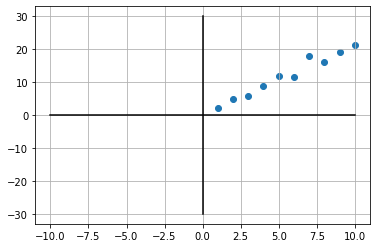

In [44]:
plot(X)

In [50]:
Xcentered = (X[0] - x.mean(), X[1] - y.mean())
m = x.mean(), y.mean()

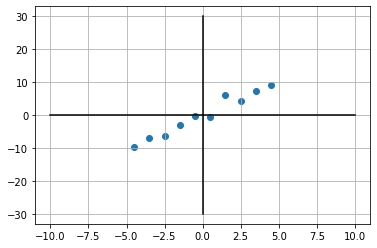

In [51]:
plot(Xcentered)

In [52]:
covmat = np.cov(Xcentered)
print(covmat, "\n")
print("Variance of X: ", np.cov(Xcentered)[0,0])
print("Variance of Y: ", np.cov(Xcentered)[1,1])
print("Covariance X and Y: ", np.cov(Xcentered)[0,1])

[[ 9.16666667 19.43578617]
 [19.43578617 42.72454216]] 

Variance of X:  9.166666666666666
Variance of Y:  42.7245421644349
Covariance X and Y:  19.435786169230287
